In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
id = pd.read_excel('/content/drive/My Drive/Credit-Line-Classification-master/Data_Dictionary (1).xlsx')

id.head(21)

,Unnamed: 0,Variable Name,Definition
0,VAR1,ID,The identifier for the account
1,VAR2,FICO,Credit score associated with account. Takes in...
2,VAR3,Business Revenue,Reported annual business revenue
3,VAR4,TSR,Risk score associated with probability of defa...
4,VAR5,Last 6M Avg Util,Average utilization of credit line in the last...
5,VAR6,Income,Reported annual business income
6,VAR7,Last 6M Avg Remit,Average amount paid towards card bills in the ...
7,VAR8,Last 6M Avg Bal,Average balance on each card in the last 6 months
8,VAR9,Internal Revolve,The average daily balance as a percentage of c...
9,VAR10,Lending AR% in last 6M,Percentage of internal balance (with XYZEE) on...


In [0]:
id['names'] = id['Unnamed: 0'].str.cat(id['Variable Name'], sep='-')

In [0]:
names = list(id['names'])
names1 = list(id['names'])[0:20]

In [0]:
missing_values = ['.']
df = pd.read_csv('/content/drive/My Drive/Credit-Line-Classification-master/development_dataset.csv', index_col='VAR1', na_values=missing_values)

In [0]:
df.head()

,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,VAR11,VAR12,VAR13,VAR14,VAR15,VAR16,VAR17,VAR18,VAR19,VAR20,VAR21
VAR1,,,,,,,,,,,,,,,,,,,,
1,828.235294,0.138889,321.428571,625.911006,1.818182,1.081550,198.113469,NaN,58.632548,0.279273,100.083403,1.0,1.0,1.0,1.540594,NaN,1,0,100.104991,Low
2,911.764706,0.027778,NaN,611.574748,8.181818,1.344479,198.600020,22.086661,NaN,NaN,15.012510,NaN,1.0,NaN,1.614613,NaN,0,1,146.654045,High
3,962.352941,0.833333,35.714286,615.825381,8.181818,0.720796,197.267767,NaN,58.632548,0.453212,210.175146,10.0,1.0,10.0,1.044599,NaN,0,0,98.249570,Medium
4,892.941177,NaN,NaN,638.076431,9.090909,0.820218,197.355744,4.363431,58.632548,NaN,NaN,NaN,1.0,NaN,1.145729,NaN,1,0,140.862306,Low
5,914.117647,0.083333,NaN,626.514988,5.181818,1.372928,198.790477,85.938202,58.632548,NaN,210.175146,NaN,NaN,NaN,1.558341,NaN,1,0,101.268503,High


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34000 entries, 1 to 34000
Data columns (total 20 columns):
VAR2     33039 non-null float64
VAR3     30615 non-null float64
VAR4     21506 non-null float64
VAR5     33999 non-null float64
VAR6     30505 non-null float64
VAR7     33165 non-null float64
VAR8     33165 non-null float64
VAR9     18183 non-null float64
VAR10    29450 non-null float64
VAR11    26435 non-null float64
VAR12    23498 non-null float64
VAR13    25478 non-null float64
VAR14    33727 non-null float64
VAR15    25976 non-null float64
VAR16    33134 non-null float64
VAR17    11806 non-null float64
VAR18    34000 non-null int64
VAR19    34000 non-null int64
VAR20    34000 non-null float64
VAR21    34000 non-null object
dtypes: float64(17), int64(2), object(1)
memory usage: 5.4+ MB


In [0]:
df.isnull().sum()

VAR2       961
VAR3      3385
VAR4     12494
VAR5         1
VAR6      3495
VAR7       835
VAR8       835
VAR9     15817
VAR10     4550
VAR11     7565
VAR12    10502
VAR13     8522
VAR14      273
VAR15     8024
VAR16      866
VAR17    22194
VAR18        0
VAR19        0
VAR20        0
VAR21        0
dtype: int64

In [0]:
X = df.drop('VAR21', axis=1)
y = df['VAR21']

In [0]:
X = X.astype(float)

###VAR14

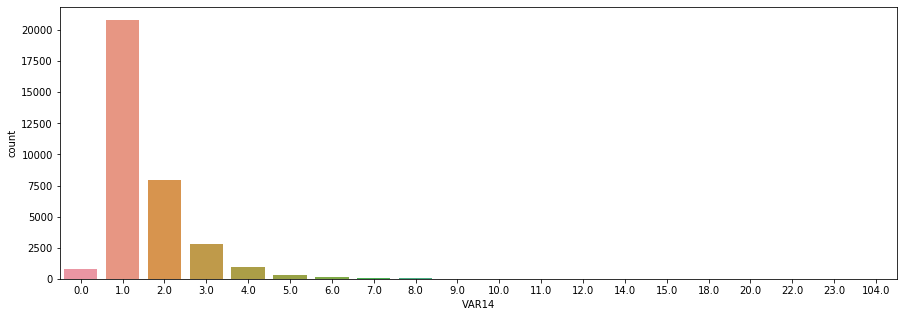

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(X['VAR14'])

In [0]:
X['VAR14'].value_counts()

1.0      20816
2.0       7965
3.0       2796
4.0        910
0.0        756
5.0        269
6.0        117
7.0         31
8.0         26
10.0        14
12.0         9
9.0          8
15.0         2
11.0         2
18.0         1
20.0         1
22.0         1
23.0         1
104.0        1
14.0         1
Name: VAR14, dtype: int64

In [0]:
X['VAR14'].fillna(0, inplace=True) #NaN values can be replaced with 0 as entity may not have account with XYZEE.

In [0]:
X['VAR14'].where(X['VAR14']<6, 6, inplace=True) #Grouping all values greater than 6 into 6 as they have very less counts.

In [0]:
X['VAR14'].value_counts()

1.0    20816
2.0     7965
3.0     2796
0.0     1029
4.0      910
5.0      269
6.0      215
Name: VAR14, dtype: int64

###VAR2

VAR2 is the credit score.

In [0]:
X['VAR2'].isnull().sum()

961

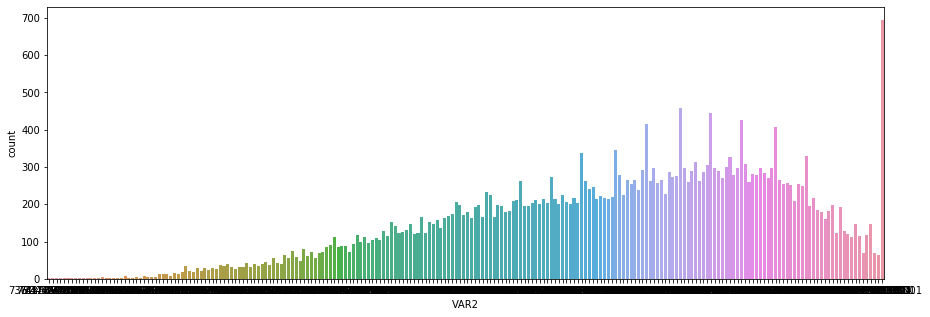

In [0]:
plt.figure(figsize=(15,5))
sns.countplot(X['VAR2'])

Here we can safely replace missing values with mean as the data is contiunous.

In [0]:
X['VAR2'].fillna(X['VAR2'].mean(), inplace=True)

###VAR3

VAR3 is the Business Revenue.

In [0]:
X['VAR3'].isnull().sum()

3385

In [0]:
X['VAR3'].fillna(X['VAR3'].mean(), inplace=True)

###VAR4

In [0]:
X['VAR4'].value_counts()

35.714286      4478
71.428571      3157
107.142857     1941
178.571429     1519
142.857143     1289
250.000000      959
285.714286      936
214.285714      839
321.428571      749
357.142857      593
464.285714      574
392.857143      476
428.571429      398
500.000000      381
607.142857      333
571.428571      326
535.714286      323
678.571429      313
642.857143      251
892.857143      239
714.285714      223
750.000000      214
857.142857      185
785.714286      178
821.428571      177
964.285714      163
928.571429      135
1000.000000     131
34.642857         3
28.571429         3
92.857143         3
597.500000        3
73.571429         3
128.214286        2
245.714286        2
527.142857        1
864.285714        1
316.071429        1
738.214286        1
157.142857        1
18.928571         1
632.857143        1
Name: VAR4, dtype: int64

In [0]:
X['VAR4'].fillna(X['VAR4'].mean(), inplace=True)

###VAR5

In [0]:
X['VAR5'].value_counts()

611.574748    7865
611.685040      12
611.572997      12
611.765571      11
611.604509      10
              ... 
619.487788       1
625.650156       1
636.910483       1
632.768391       1
629.081475       1
Name: VAR5, Length: 17379, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


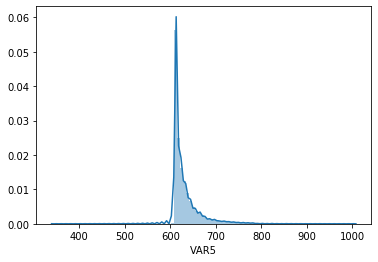

In [0]:
sns.distplot(X['VAR5'], bins=100)

In [0]:
X['VAR5'].fillna(X['VAR5'].mean(), inplace=True)

###VAR6

VAR6 is the Income.

In [0]:
X['VAR6'].value_counts()

11.363636    3031
9.090909     2528
18.181818    2376
8.181818     2215
13.636364    1772
             ... 
26.090909       1
13.021909       1
42.636364       1
4.513636        1
10.690909       1
Name: VAR6, Length: 702, dtype: int64

In [0]:
X['VAR6'].isnull().sum()

3495

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


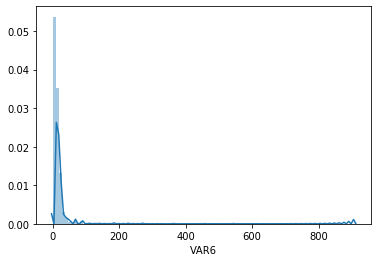

In [0]:
sns.distplot(X['VAR6'], bins=100)

In [0]:
X['VAR6'].fillna(X['VAR6'].mean(), inplace=True)

###VAR 7 and 8

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


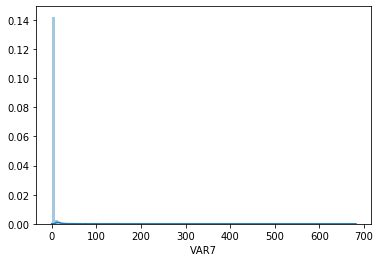

In [0]:
sns.distplot(X['VAR7'], bins=100)

In [0]:
X['VAR7'].value_counts()

0.559710    2039
0.565377      32
0.562993      24
0.631316      23
0.917743      23
            ... 
1.430693       1
2.124540       1
0.959335       1
2.200686       1
0.737777       1
Name: VAR7, Length: 29186, dtype: int64

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


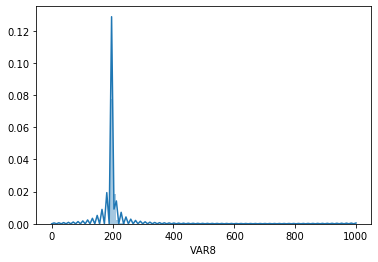

In [0]:
sns.distplot(X['VAR8'], bins=100)

In [0]:
X['VAR8'].value_counts()

196.911295    1710
196.922914      50
196.918026      29
196.924749      23
196.932705      20
              ... 
208.015081       1
197.820576       1
197.006259       1
197.165015       1
240.874620       1
Name: VAR8, Length: 30170, dtype: int64

In [0]:
X['VAR7'].fillna(X['VAR7'].mean(), inplace=True)
X['VAR8'].fillna(X['VAR8'].mean(), inplace=True)

###VAR 9

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


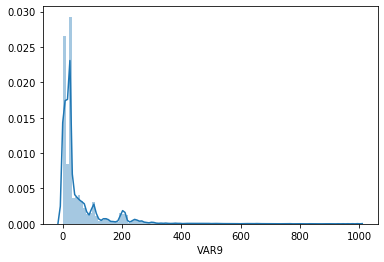

In [0]:
sns.distplot(X['VAR9'], bins=100)

In [0]:
X['VAR9'].fillna(X['VAR9'].mean(), inplace=True)

###VAR10

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


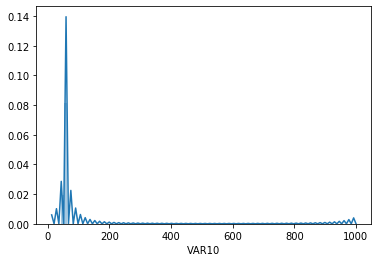

In [0]:
sns.distplot(X['VAR10'], bins=100)

In [0]:
X['VAR10'].fillna(X['VAR10'].mean(), inplace=True)

###VAR11

In [0]:
X['VAR11'].value_counts()

0.003465     29
0.000693     29
0.004851     28
0.020790     25
0.006237     24
             ..
5.701883      1
16.621946     1
5.931954      1
17.081395     1
13.499354     1
Name: VAR11, Length: 12497, dtype: int64

In [0]:
X['VAR11'].fillna(X['VAR11'].mean(), inplace=True)

###VAR12

In [0]:
X['VAR12'].isnull().sum()

10502

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


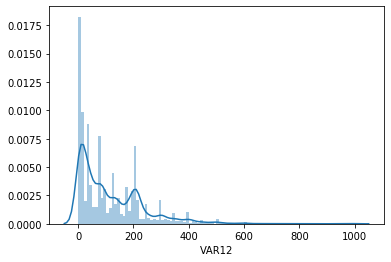

In [0]:
sns.distplot(X['VAR12'], bins=100)

In [0]:
X['VAR12'].fillna(X['VAR12'].mean(), inplace=True)

###VAR 17,13, 15 and 16

In [0]:
#Sixty percent of values in this column are NaN. That's why it is safe to remove it.
X.drop('VAR17', axis=1, inplace=True)

In [0]:
X['VAR13'].fillna(X['VAR13'].mean(), inplace=True)
X['VAR15'].fillna(X['VAR15'].mean(), inplace=True)
X['VAR16'].fillna(X['VAR16'].mean(), inplace=True)

### y variable

In [0]:
y = y.astype('category')

In [0]:
y = y.cat.codes

In [0]:
y.head()

VAR1
1    1
2    0
3    2
4    1
5    0
dtype: int8

#BASE MODEL

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
m = RandomForestClassifier(n_estimators=30, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True, random_state=42)

In [0]:
m.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=0.5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
                       oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
preds = m.predict(X_test)
base_score= accuracy_score(y_test, preds)

In [0]:
base_score

0.5652941176470588

In [0]:
m.oob_score_

0.5463970588235294

In [0]:
!pip install eli5

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

Using TensorFlow backend.


In [0]:
perm = PermutationImportance(m, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=X_test.columns.tolist())

Weight,Feature
0.0326 ± 0.0058,VAR20
0.0137 ± 0.0060,VAR2
0.0067 ± 0.0086,VAR4
0.0066 ± 0.0019,VAR3
0.0049 ± 0.0072,VAR7
0.0038 ± 0.0038,VAR8
0.0028 ± 0.0033,VAR14
0.0027 ± 0.0031,VAR5
0.0012 ± 0.0058,VAR11
0.0011 ± 0.0030,VAR10


Here we can see that:


*   VAR7 and VAR8 are related.

*   VAR16 and VAR7 are related.

*   VAR13 and VAR15 are related.


In [0]:
X_VAR15 = X_train.drop('VAR13', axis=1)
X_VAR15_test = X_test.drop('VAR13', axis=1)

In [0]:
m.fit(X_VAR13, y_train)
preds_2 = m.predict(X_VAR13_test)
new_score = accuracy_score(y_test, preds_2)

In [0]:
new_score

0.5638235294117647

In [0]:
m.oob_score_

0.5452573529411765

Removing VAR15 reduces model performance a little bit.

In [0]:
X_train.drop('VAR19', axis=1, inplace=True)
X_test.drop('VAR19', axis=1, inplace=True)

m.fit(X_train, y_train)
preds_3 = m.predict(X_test)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
new_score_1 = accuracy_score(y_test, preds_3)

In [0]:
new_score_1

0.5675

In [0]:
m.oob_score_

0.5456617647058823

Removing VAR19 doesn't affect the model score. So it is safe to remove it.

In [0]:
X_train.drop('VAR16', axis=1, inplace=True)
X_test.drop('VAR16', axis=1, inplace=True)

m.fit(X_train, y_train)
preds_4 = m.predict(X_test)
new_score_1 = accuracy_score(y_test, preds_4)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
new_score_1

0.5683823529411764